<a href="https://colab.research.google.com/github/Yolan00/Pass/blob/main/ICP_Code%202023_(Asil-Simone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files  # library used to upload files.

uploaded = files.upload()  # upload CORPUS.zip

!unzip CORPUS.zip
! mkdir RESULTS

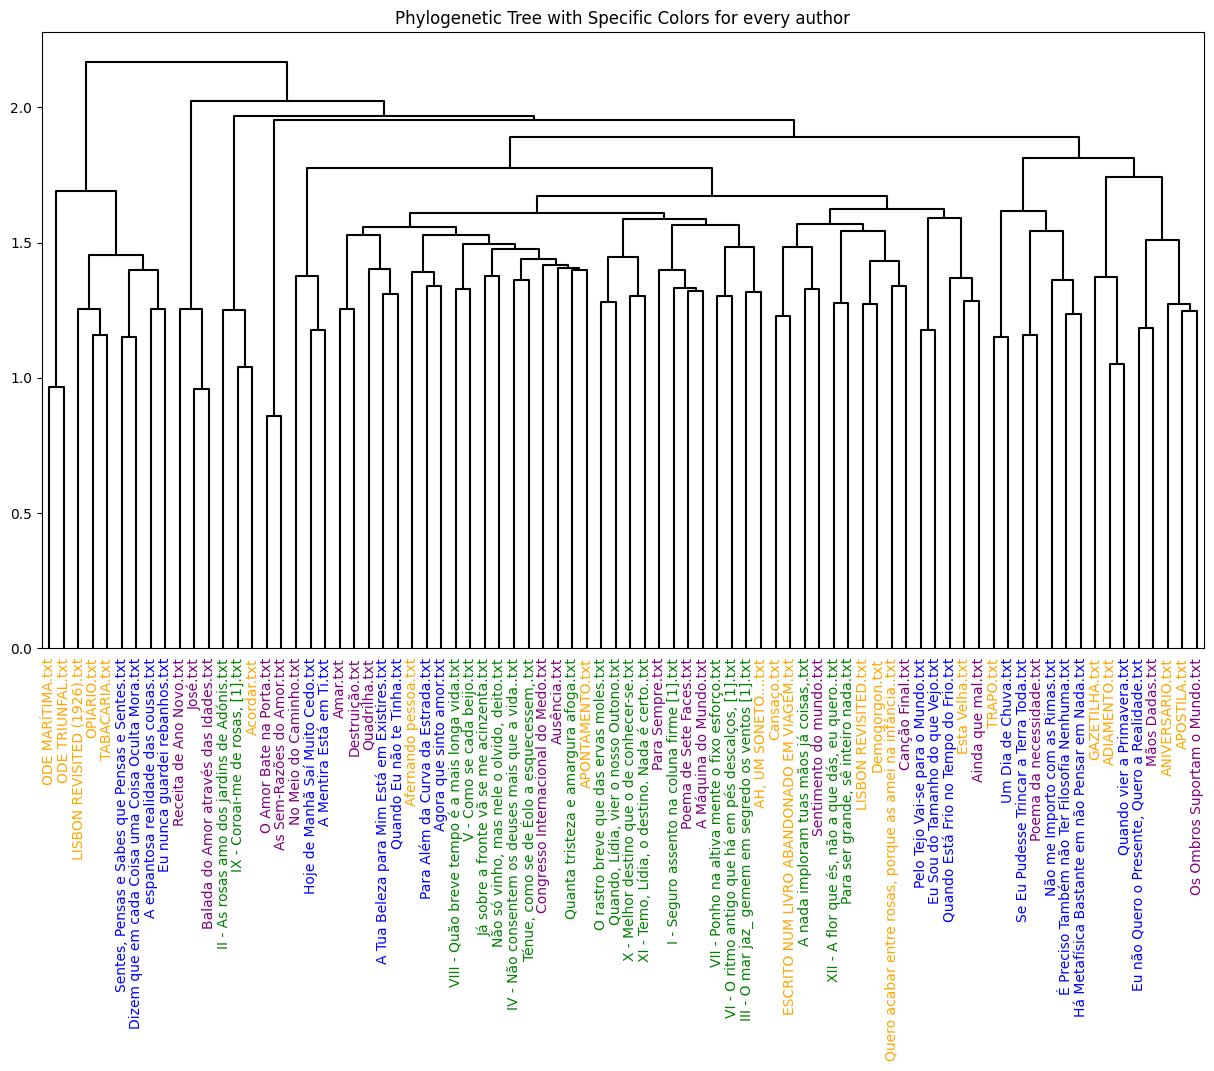

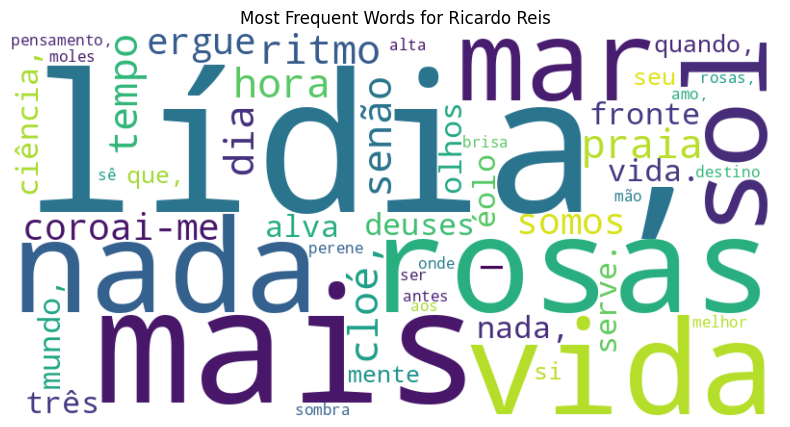

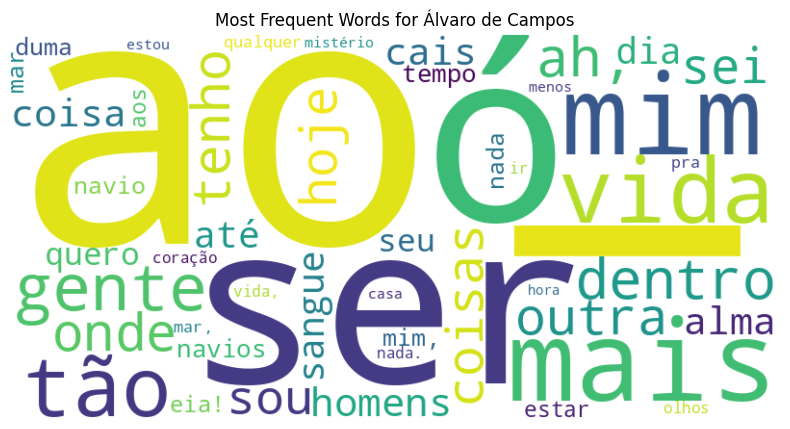

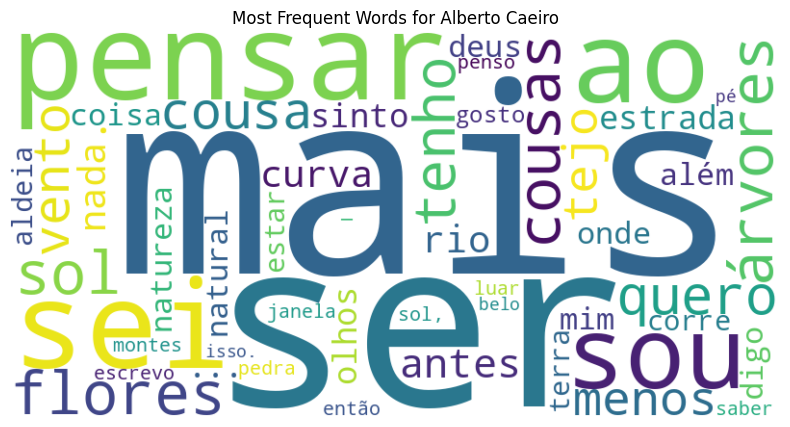

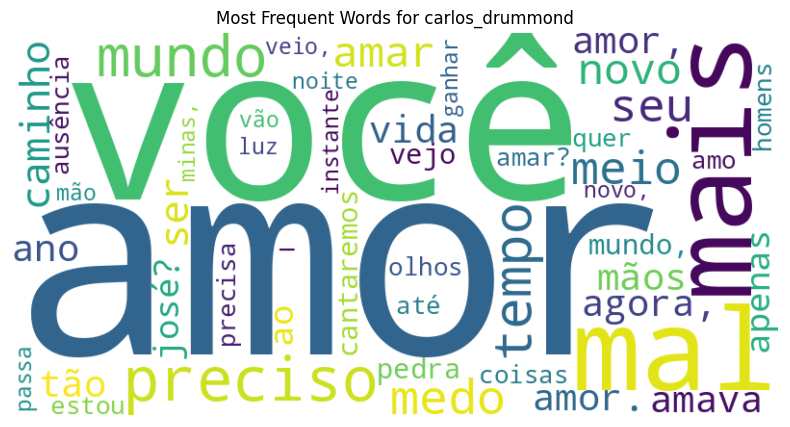


Ricardo Reis:
Stop Words vs. Main Words Ratio: 0.4508

Álvaro de Campos:
Stop Words vs. Main Words Ratio: 0.4492

Alberto Caeiro:
Stop Words vs. Main Words Ratio: 0.5353

carlos_drummond:
Stop Words vs. Main Words Ratio: 0.4495



Ricardo Reis Average Lexical Density: 0.8274582560296846

Álvaro de Campos Average Lexical Density: 0.45332118925248843

Alberto Caeiro Average Lexical Density: 0.5621460506706408

Carlos Drummond Avarage Lexical Density: 0.6315254237288136


In [ ]:
from collections import Counter
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# read poems from  folder
def read_poems(folder_path):
    poems = []  #Initializes an empty list. This list will be used to store the contents of each poem read from the files.
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):  #Check .txt extension
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file: #Open the text in read mode with UTF-8 encoding
                poems.append(file.read()) #Read content of the file and appends it to the "poems" list
    return poems

# List of Portuguese stop words
portuguese_stop_words = [
    "a", "à", "agora", "ainda", "algo", "algumas", "alguns", "ampla", "amplas", "amplo", "amplos",
    "aquela", "aquelas", "aquele", "aqueles", "aqui", "aquilo", "as", "às", "assim", "atrás", "bem",
    "boa", "boas", "bom", "bons", "breve", "cá", "cada", "cerca", "com", "como", "contra", "contudo",
    "da", "daquele", "daqueles", "das", "de", "dela", "delas", "dele", "deles", "depois", "desde",
    "desta", "destas", "deste", "deste", "destes", "deve", "devem", "devendo", "dever", "deverá",
    "deverão", "deveria", "deveriam", "devia", "deviam", "disse", "disso", "disto", "diz", "dizem",
    "dizer", "do", "dos", "e", "é", "ela", "elas", "ele", "eles", "em", "enquanto", "entre", "era",
    "essa", "essas", "esse", "esses", "esta", "está", "estão", "estas", "estava", "estavam", "este",
    "este", "estes", "eu", "fará", "faz", "fazer", "fazia", "fez", "fim", "foi", "for", "foram",
    "forem", "fosse", "fossem", "grande", "grandes", "há", "isso", "isto", "já", "la", "lá", "lhe",
    "lhe", "lo", "mas", "me", "mesmo", "meu", "meus", "minha", "minhas", "muito", "muitos", "na",
    "não", "nas", "nem", "nenhum", "nenhuma", "neste", "no", "nos", "nós", "nossa", "nossas", "nosso",
    "nossos", "num", "numa", "nunca", "o", "os", "ou", "para", "pela", "pelas", "pelo", "pelos",
    "pequena", "pequenas", "pequeno", "pequenos", "per", "perante", "pode", "podendo", "poder",
    "poderá", "poderão", "podia", "podiam", "pôde", "pôr", "põe", "por", "porque", "posso", "pouca",
    "poucas", "pouco", "poucos", "primeiro", "primeiros", "própria", "próprias", "próprio", "próprios",
    "quais", "qual", "quando", "quanto", "quantos", "que", "quem", "são", "se", "seja", "sejam",
    "sem", "sempre", "sendo", "será", "serão", "seria", "seriam", "só", "sob", "sobre", "sua", "suas",
    "talvez", "também", "tampouco", "te", "tem", "temos", "tenha", "ter", "terá", "terão", "teria",
    "teriam", "teu", "teus", "teve", "ti", "tido", "tinha", "tinham", "toda", "todas", "todo", "todos",
    "tu", "tua", "tuas", "tudo", "último", "últimos", "um", "uma", "umas", "uns", "vendo", "ver", "vez",
    "vezes", "vindo", "vir", "vos", "vós"
]

# Paths to the folders for each heteronym
ricardo_reis_path = "/content/CORPUS/recardo reis"
alvaro_campos_path = "/content/CORPUS/alvaro de campos"
alberto_caeiro_path = "/content/CORPUS/alberto caeiro"
carlos_drummond_path = "/content/CORPUS/carlos drummond"

# Output file paths for saving most frequent words and images
output_file_ricardo_reis = "/content/ricardo_reis_top_words.txt"
output_image_ricardo_reis = "/content/ricardo_reis_wordcloud.png"

output_file_alvaro_campos = "/content/alvaro_campos_top_words.txt"
output_image_alvaro_campos = "/content/alvaro_campos_wordcloud.png"

output_file_alberto_caeiro = "/content/alberto_caeiro_top_words.txt"
output_image_alberto_caeiro = "/content/alberto_caeiro_wordcloud.png"

output_file_carlos_drummond = "/content/carlos_drummond_top_words.txt"
output_image_carlos_drummond = "/content/carlos_drummond_wordcloud.png"

# Read poems for each heteronym
ricardo_reis_poems = read_poems(ricardo_reis_path)
alvaro_campos_poems = read_poems(alvaro_campos_path)
alberto_caeiro_poems = read_poems(alberto_caeiro_path)
carlos_drummond_poems = read_poems(carlos_drummond_path)

# Combine all poems, heteronyms, and titles
all_poems = ricardo_reis_poems + alvaro_campos_poems + alberto_caeiro_poems + carlos_drummond_poems
all_heteronyms = ['Ricardo Reis', 'Álvaro de Campos','Alberto Caeiro', 'carlos_drummond']

# Create a list of titles for each poem based on the heteronym
ricardo_reis_titles = [f"{file_name}" for file_name in os.listdir(ricardo_reis_path) if file_name.endswith(".txt")]
alvaro_campos_titles = [f"{file_name}" for file_name in os.listdir(alvaro_campos_path) if file_name.endswith(".txt")]
alberto_caeiro_titles = [f"{file_name}" for file_name in os.listdir(alberto_caeiro_path) if file_name.endswith(".txt")]
carlos_drummond_titles = [f"{file_name}" for file_name in os.listdir(carlos_drummond_path) if file_name.endswith(".txt")]

# Combine the titles
all_poem_titles = ricardo_reis_titles + alvaro_campos_titles + alberto_caeiro_titles + carlos_drummond_titles

# TF-IDF  (Term Frequency-Inverse Document Frequency) vectorization (for style analysis)
vectorizer = TfidfVectorizer(stop_words=portuguese_stop_words, lowercase=True)  #Matrix
tfidf_matrix = vectorizer.fit_transform(all_poems)

# Calculate cosine similarity (for style analysis)
cosine_sim = cosine_similarity(tfidf_matrix)

# Perform hierarchical clustering (for style analysis)
linkage_matrix = linkage(cosine_sim, method='ward')

#Dendrogram
plt.figure(figsize=(15, 8))

dendrogram(
    linkage_matrix,
    labels=all_poem_titles,  # Use the titles of the poems
    leaf_rotation=90,
    leaf_font_size=10,
    above_threshold_color='black',
    no_labels=False,  # Display labels
    orientation='top',  # Display the dendrogram from top to bottom
    color_threshold=np.inf,  # Set color_threshold to infinity to prevent automatic color assignment
    link_color_func=lambda k: 'black',  # Manually set link colors to black
)

# Get the axes of the current figure
ax = plt.gca()

# Extract the x-tick labels
xtick_labels = ax.get_xticklabels()

# Define the color for each author's titles
color_map = {
    'Ricardo Reis': 'green',
    'Álvaro de Campos': 'orange',
    'Alberto Caeiro': 'blue',
    'carlos_drummond': 'purple'
}

# Create a comprehensive list of all titles to color map
all_titles_color_map = {}
all_titles_color_map.update({title: color_map['Ricardo Reis'] for title in ricardo_reis_titles})
all_titles_color_map.update({title: color_map['Álvaro de Campos'] for title in alvaro_campos_titles})
all_titles_color_map.update({title: color_map['Alberto Caeiro'] for title in alberto_caeiro_titles})
all_titles_color_map.update({title: color_map['carlos_drummond'] for title in carlos_drummond_titles})

# Color the labels based on the author's titles
for label in xtick_labels:
    title = label.get_text()
    label.set_color(all_titles_color_map.get(title, 'black'))  # Default to black if not in the list

plt.title('Phylogenetic Tree with Specific Colors for every author')
plt.savefig("/content/RESULTS/Phylogenetic Tree with Specific Colors for every author", bbox_inches='tight')
plt.show()


#Here we finish style analysis and we move on to other functions.

# Function to count most frequent words and save as a text file
def count_and_save_most_frequent_words(poems, output_file, stop_words=None, top_n=50):
    # Combine all poems into a single string for analysis
    all_poems = ' '.join(poems)

    # Tokenize the combined string into words and convert to lowercase
    words = all_poems.lower().split()

    # Remove stop words
    if stop_words:
        words = [word for word in words if word not in portuguese_stop_words]

    # Count the frequency of each word
    word_counts = Counter(words)

    # Get the top N most frequent words
    top_words = dict(word_counts.most_common(top_n))

    # Save the list of most frequent words to a text file
    with open(output_file, 'w', encoding='utf-8') as file:
        for word, count in top_words.items():
            file.write(f"{word}: {count}\n")

    return top_words

# Function to visualize most frequent words using WordCloud and save as an image
def visualize_most_frequent_words(word_counts, heteronym_name, output_image_path):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Frequent Words for {heteronym_name}")
    plt.savefig(output_image_path, bbox_inches='tight')  # Save as an image
    plt.show()


# a function that calculates the ratio of the stop words for each heteronym
def print_stop_words_ratio(poems, portuguese_stop_words):
    # Combine all poems into a single string for analysis
    all_poems = ' '.join(poems)

    # Tokenize the combined string into words and convert to lowercase
    words = all_poems.lower().split()

    # Count the total number of words
    total_words = len(words)

    # Count the number of stop words
    stop_words_count = sum(1 for word in words if word in portuguese_stop_words)

    # Calculate the ratio
    ratio = stop_words_count / total_words

    print(f"Stop Words vs. Main Words Ratio: {ratio:.4f}")

# calculates the ratio of unique words out of all words
def calculate_average_lexical_density(poems):
    total_unique_words = 0
    total_words = 0

    for poem in poems:
        # Tokenize the poem into words and convert to lowercase
        words = poem.lower().split()

        # Calculate the number of unique words
        unique_words = set(words)

        # Update totals
        total_unique_words += len(unique_words)
        total_words += len(words)

    # Calculate the overall lexical density ratio
    if total_words == 0:
        return 0  # Avoid division by zero

    average_lexical_density = total_unique_words / total_words
    return average_lexical_density



# Output file paths for saving most frequent words and images
output_file_ricardo_reis = "/content/RESULTS/ricardo_reis_top_words.txt"
output_image_ricardo_reis = "/content/RESULTS/ricardo_reis_wordcloud.png"

output_file_alvaro_campos = "/content/RESULTS/alvaro_campos_top_words.txt"
output_image_alvaro_campos = "/content/RESULTS/alvaro_campos_wordcloud.png"

output_file_alberto_caeiro = "/content/RESULTS/alberto_caeiro_top_words.txt"
output_image_alberto_caeiro = "/content/RESULTS/alberto_caeiro_wordcloud.png"

output_file_carlos_drummond = "/content/RESULTS/carlos_drummond_top_words.txt"
output_image_carlos_drummond = "/content/RESULTS/carlos_drummond_wordcloud.png"

# Read poems for each heteronym
ricardo_reis_poems = read_poems(ricardo_reis_path)
alvaro_campos_poems = read_poems(alvaro_campos_path)
alberto_caeiro_poems = read_poems(alberto_caeiro_path)
carlos_drummond_poems = read_poems(carlos_drummond_path)

# Count and save most frequent words for each heteronym
ricardo_reis_top_words = count_and_save_most_frequent_words(ricardo_reis_poems, output_file_ricardo_reis, portuguese_stop_words)
alvaro_campos_top_words = count_and_save_most_frequent_words(alvaro_campos_poems, output_file_alvaro_campos, portuguese_stop_words)
alberto_caeiro_top_words = count_and_save_most_frequent_words(alberto_caeiro_poems, output_file_alberto_caeiro, portuguese_stop_words)
carlos_drummond_top_words = count_and_save_most_frequent_words(carlos_drummond_poems, output_file_carlos_drummond, portuguese_stop_words)

# Visualize most frequent words for each heteronym and save as images
visualize_most_frequent_words(ricardo_reis_top_words, "Ricardo Reis", output_image_ricardo_reis)
visualize_most_frequent_words(alvaro_campos_top_words, "Álvaro de Campos", output_image_alvaro_campos)
visualize_most_frequent_words(alberto_caeiro_top_words, "Alberto Caeiro", output_image_alberto_caeiro)
visualize_most_frequent_words(carlos_drummond_top_words, "carlos_drummond", output_image_carlos_drummond)

# print the stop words ratio
print("\nRicardo Reis:")
print_stop_words_ratio(ricardo_reis_poems, portuguese_stop_words)

print("\nÁlvaro de Campos:")
print_stop_words_ratio(alvaro_campos_poems, portuguese_stop_words)

print("\nAlberto Caeiro:")
print_stop_words_ratio(alberto_caeiro_poems, portuguese_stop_words)

print("\ncarlos_drummond:")
print_stop_words_ratio(carlos_drummond_poems, portuguese_stop_words)

# Add an empty line
print("\n")

#lexical density printing
# Call the function for each heteronym
ricardo_reis_average_density = calculate_average_lexical_density(ricardo_reis_poems)
alvaro_campos_average_density = calculate_average_lexical_density(alvaro_campos_poems)
alberto_caeiro_average_density = calculate_average_lexical_density(alberto_caeiro_poems)
carlos_drummond_average_density = calculate_average_lexical_density(carlos_drummond_poems)

# Print the density results
print("\nRicardo Reis Average Lexical Density:", ricardo_reis_average_density)
print("\nÁlvaro de Campos Average Lexical Density:", alvaro_campos_average_density)
print("\nAlberto Caeiro Average Lexical Density:", alberto_caeiro_average_density)
print("\nCarlos Drummond Avarage Lexical Density:", carlos_drummond_average_density)